In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Bad key "text.kerning_factor" on line 4 in
C:\Users\91920\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [4]:
dataset = pd.read_csv(path, names = headernames)
print(type(dataset))
dataset.head()

<class 'pandas.core.frame.DataFrame'>


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.drop(['Class'],axis= 1 ,inplace=True)
dataset

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

In [6]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
pca=PCA()

In [8]:
pca.fit(dataset)
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [9]:
pca.explained_variance_ratio_.cumsum()

array([0.92461621, 0.97763178, 0.99481691, 1.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

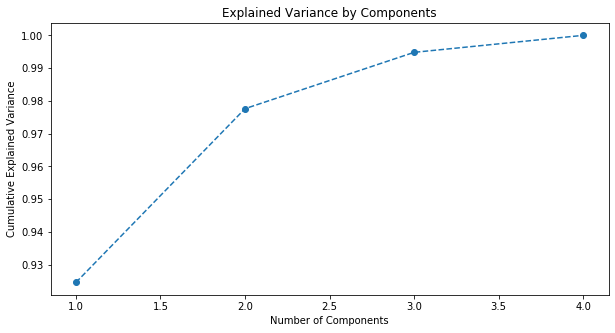

In [15]:
# Plot the cumulative variance explained by total number of components.

# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % - 90% of the explained variance.
plt.figure(figsize=(10,5))

plt.plot (range (1,5), pca.explained_variance_ratio_.cumsum (), marker = 'o', linestyle = '--')

plt.title('Explained Variance by Components')

plt.xlabel('Number of Components')

plt.ylabel('Cumulative Explained Variance')

In [12]:
pca=PCA(n_components= 2)
pca.fit(dataset)
pca.explained_variance_ratio_


array([0.92461621, 0.97763178])

In [11]:
df= pca.transform(dataset)
print(df)
#new_df


#---------------------------#
df1=np.transpose(df)
PCA1=df1[0]
PCA2=df1[1]

[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]
 [-2.50652679  0.65193501]
 [-2.61314272  0.02152063]
 [-2.78743398 -0.22774019]
 [-3.22520045 -0.50327991]
 [-2.64354322  1.1861949 ]
 [-2.38386932  1.34475434]
 [-2.6225262   0.81808967]
 [-2.64832273  0.31913667]
 [-2.19907796  0.87924409]
 [-2.58734619  0.52047364]
 [-2.3105317   0.39786782]
 [-2.54323491  0.44003175]
 [-3.21585769  0.14161557]
 [-2.30312854  0.10552268]
 [-2.35617109 -0.03120959]
 [-2.50791723 -0.13905634]
 [-2.469056    0.13788731]
 [-2.56239095  0.37468456]
 [-2.63982127  0.31929007]
 [-2.63284791 -0.19007583]
 [-2.58846205 -0.19739308]
 [-2.41007734  0.41808001]
 [-2.64763667  0.81998263]
 [-2.59715948  1.10002193]
 [-2.67384469 -0.1066917 ]
 [-2.86699985  0.0771931 ]
 [-2.62522846  0.60680001]
 

In [13]:
from sklearn.cluster import KMeans

In [17]:
sse = []
kmeans = range(1,10)
for k in kmeans:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
    
print(sse)

C:\Users\91920\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


[665.5955666521963, 137.15100934920733, 63.87383806036229, 42.26258875648066, 33.60413548665399, 26.072167353029073, 21.91886230330283, 18.0815543792374, 15.737984019089966]


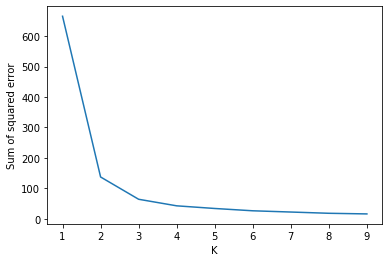

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(kmeans,sse)

In [65]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [66]:
km.cluster_centers_

array([[-2.64084076,  0.19051995],
       [ 2.34645113,  0.27235455],
       [ 0.66443351, -0.33029221]])

In [75]:
df_plot= pd.DataFrame()
df_plot['pca1']=np.transpose(PCA1)
df_plot['pca2']=np.transpose(PCA2)
df_plot['cluster']=y_predicted
df_plot

,pca1,pca2,cluster
0,-2.684207,0.326607,0
1,-2.715391,-0.169557,0
2,-2.889820,-0.137346,0
3,-2.746437,-0.311124,0
4,-2.728593,0.333925,0
...,...,...,...
145,1.944017,0.187415,1
146,1.525664,-0.375021,2
147,1.764046,0.078519,1
148,1.901629,0.115877,1


In [76]:
df_plot1 = df_plot[df_plot.cluster==0]
df_plot2 = df_plot[df_plot.cluster==1]
df_plot3 = df_plot[df_plot.cluster==2]

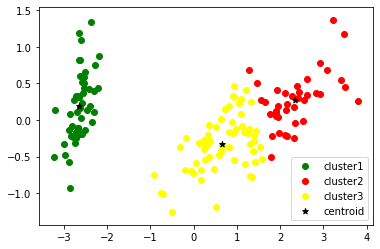

In [88]:
plt.scatter(df_plot1['pca1'],df_plot1['pca2'],color='green',label='cluster1')
plt.scatter(df_plot2['pca1'],df_plot2['pca2'],color='red',label='cluster2')
plt.scatter(df_plot3['pca1'],df_plot3['pca2'],color='yellow',label='cluster3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()

In [18]:
pwd

'C:\\Users\\91920\\Machine Learning'